<a href="https://colab.research.google.com/github/Jakhongir0103/Transport_classification_model/blob/master/DL_transport_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### We are building a model to recognize a boat, a car, and an airplane using the [Open Images Dataset v4](https://storage.googleapis.com/openimages/web/index.html)

In [3]:
!pip install fastai==2.5.3

In [4]:
import fastai
import torch

In [ ]:
# download the dataset
!git clone https://github.com/EscVM/OIDv4_ToolKit.git
!cd OIDv4_ToolKit && pip install -r requirements.txt
!cd OIDv4_ToolKit && python main.py -h

# get the 3 classes (Car Airplane, Boat)
!cd OIDv4_ToolKit && python main.py downloader --Dataset /content --classes Car Airplane Boat --type_csv train --limit 250

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


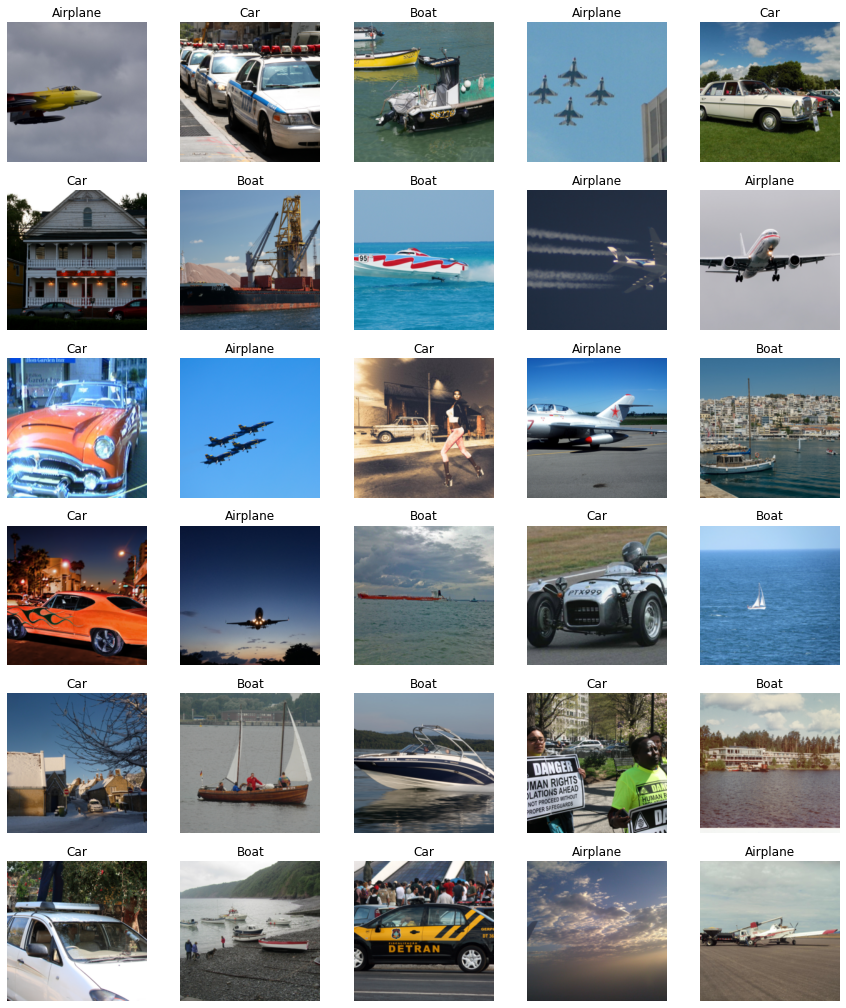

In [5]:
from fastai.vision.all import *

# path
path = Path('/content/train')

# datablock
transports = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    get_y = parent_label,
    splitter = RandomSplitter(seed=42, valid_pct=0.2),
    item_tfms = Resize(224)
)

# dataloader
dls = transports.dataloaders(path)

# visualize the data
dls.train.show_batch(max_n=30, nrows=6)

In [6]:
# train
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

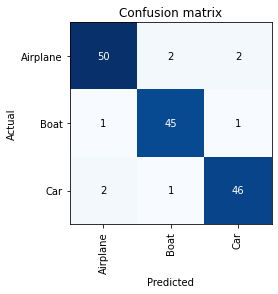

In [7]:
# evaluation
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [14]:
# test the model
from ipywidgets import widgets

upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction: Boat
Probability: 100.0%


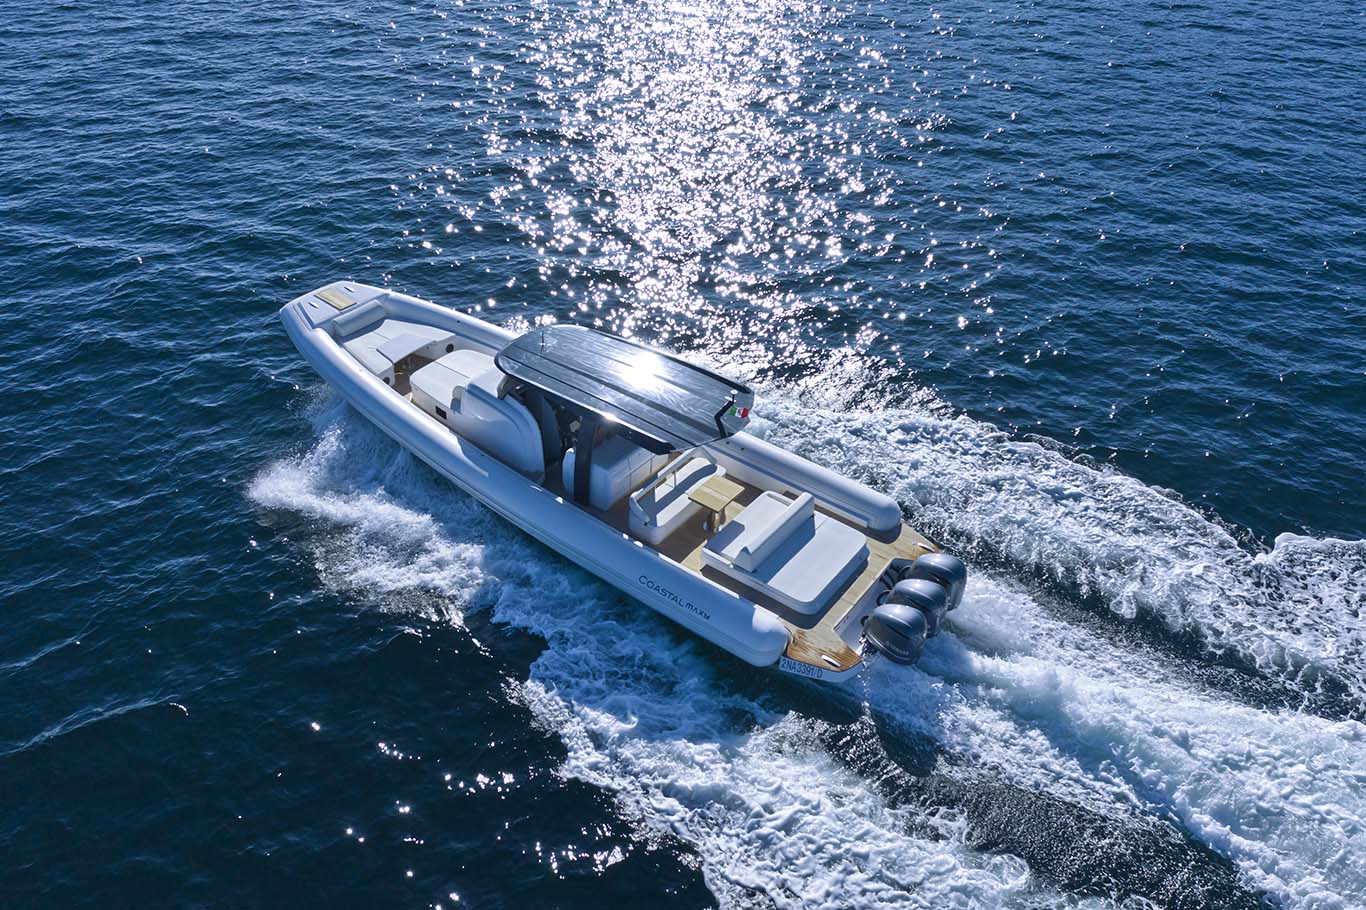

In [15]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f'Prediction: {pred}')
print(f'Probability: {probs[pred_id]*100:.1f}%')
img

In [10]:
learn.export('transports_model.pkl')